# 첫 번째 심층 신경망

## 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

## 데이터 적재

In [2]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [20]:
x_train[54, 12, 13, 1] 

0.36862746

## 모델 만들기

### activation(비선형 활성화 함수)
    1. ReLU                     LeakyReLU
        y = 0 (if x < 0)         ax (0 < a < 1, if x < 0)
        y = x (if x >= 0)        x (if x >= 0)
                                 // gradient가 0이 되지 않도록
    2. sigmoid
        y = 1 / (1 + exp(-x))
        // 0 < y < 1
        // 이진분류 or 다중레이블분류(정답이 여러 레이블일 수 있음)
    3. softmax
        y_i = exp(x_i) / sum(j=1 to J) exp(x_j)
        // 다중분류(정답이 1개)

In [21]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
32*32*3 == 3072         ## input
(3072+1)*200 == 614600  ## flatten
(200+1)*150 == 30150    # Dense
(150+1)*10 == 1510      # Dense

True

## 모델 컴파일

### loss(손실 함수)
    1. MSE(Mean Squared Error; 평균 제곱 오차)
        회귀 문제
    2. categorical cross-entropy(범주형 크로스 엔트로피)
        다중분류(정답이 1개)
    3. binary cross-entropy(이진 크로스 엔트로피)
        이진분류 or 다중레이블분류(정답이 여러 레이블일 수 있음)

### optimizer(옵티마이저): loss의 gradient를 기반으로 가중치 업데이트
    1. Adam(learning_rate=옵션)
    2. RMSProp

In [24]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## 모델 훈련

In [25]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10



1563/1563 [==============================] - 6s 3ms/step - loss: 1.8464 - accuracy: 0.3326
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6708 - accuracy: 0.4014
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5909 - accuracy: 0.4360
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5386 - accuracy: 0.4535
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4955 - accuracy: 0.4640
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4643 - accuracy: 0.4779
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4352 - accuracy: 0.4880
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4098 - accuracy: 0.4978
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3893 - accuracy: 0.5053
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3654 - accurac

## 모델 평가

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4237 - accuracy: 0.4898


[1.4236747026443481, 0.48980000615119934]

In [35]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

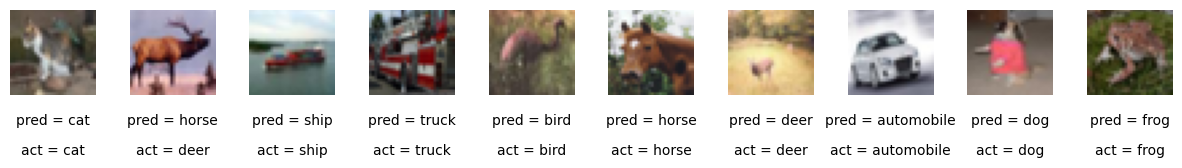

: 

In [36]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
